#  Total number of Home Wins, Draws, and Away Wins

Import necessary libraries

In [1]:
import requests
import json
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
%matplotlib inline

The `BASE_URL` will point the notebook at the Django API. If using localhost, the Django projcet must be running.

In [2]:
BASE_URL = 'http://127.0.0.1:8000/api/'

The `results` array contains three indexes, one each for home wins, draws, and away wins.

In [3]:
home_goals = []
results = []
res_map = {
    'H': 2,
    'D': 1,
    'A': 0,
}

The API is paginated, with the `next` field being `null` when the last page is reached

In [4]:
next_url = BASE_URL + 'matches'

while next_url is not None:
    response = requests.get(next_url)
    data = json.loads(response.text)
    
    for match in data['results']:
        home_goals.append(match['full_time_home_goals'])
        results.append(res_map[match['full_time_result']])
    next_url = data['next']

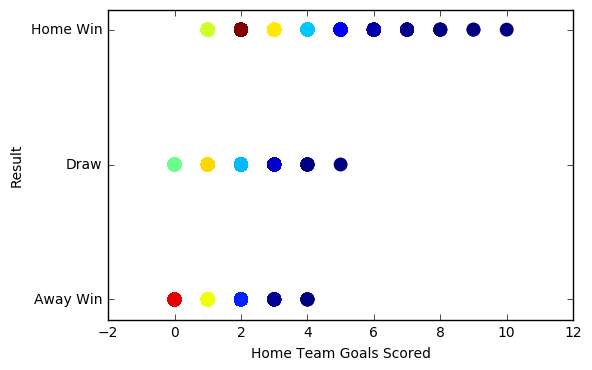

In [23]:
# Calculate the point density
goals_per_result = np.vstack([home_goals, results])
z = gaussian_kde(goals_per_result)(goals_per_result)

fig, ax = plt.subplots()
ax.set_ylabel('Result')
ax.set_yticks([0, 1, 2])
ax.set_yticklabels(('Away Win', 'Draw', 'Home Win'))
ax.set_xlabel('Home Team Goals Scored')
ax.scatter(home_goals, results, c=z, s=100, edgecolor='')
plt.show()

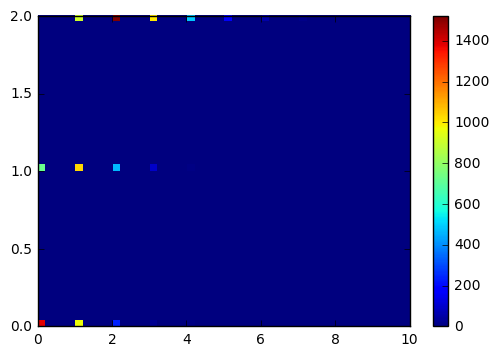

In [17]:
ax = plt.hist2d(home_goals, results, (50, 50), cmap=plt.cm.jet)
plt.colorbar()
plt.show()

In [ ]:
home_goals_per_home_wins = [(match, home_goals[])]